In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

## Solving the model

#### Part 1: cytoplasm vs membrane

Some definitions:

alpha = membrane conversion factor (= sa_vol ratio * cortical thickness)

d = dosage (c + alpha * m) i.e. cytoplasmic concentration if all in cytoplasm

Four solutions

In [2]:
def model1(ka, km, alpha, d):
    return (-alpha ** 2 * km ** 3 + alpha ** 2 * km ** 2 + 2 * alpha * d * ka * km ** 2 - alpha * km ** 2 * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 + 2 * alpha * km + 4 * d * ka + 1) - alpha * km ** 2 + alpha * km * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 + 2 * alpha * km + 4 * d * ka + 1) + alpha * km + 2 * d * ka) / (
                   2 * alpha ** 2 * ka * km ** 4 + 4 * alpha * ka * km ** 2 + 2 * ka)


def model2(ka, km, alpha, d):
    return (-alpha ** 2 * km ** 3 + alpha ** 2 * km ** 2 + 2 * alpha * d * ka * km ** 2 + alpha * km ** 2 * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 + 2 * alpha * km + 4 * d * ka + 1) - alpha * km ** 2 - alpha * km * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 + 2 * alpha * km + 4 * d * ka + 1) + alpha * km + 2 * d * ka) / (
                   2 * alpha ** 2 * ka * km ** 4 + 4 * alpha * ka * km ** 2 + 2 * ka)


def model3(ka, km, alpha, d):
    return (alpha ** 2 * km ** 3 + alpha ** 2 * km ** 2 + 2 * alpha * d * ka * km ** 2 - alpha * km ** 2 * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 - 2 * alpha * km + 4 * d * ka + 1) - alpha * km ** 2 - alpha * km * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 - 2 * alpha * km + 4 * d * ka + 1) - alpha * km + 2 * d * ka) / (
                   2 * alpha ** 2 * ka * km ** 4 + 4 * alpha * ka * km ** 2 + 2 * ka)


def model4(ka, km, alpha, d):
    return (alpha ** 2 * km ** 3 + alpha ** 2 * km ** 2 + 2 * alpha * d * ka * km ** 2 + alpha * km ** 2 * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 - 2 * alpha * km + 4 * d * ka + 1) - alpha * km ** 2 + alpha * km * np.sqrt(
        alpha ** 2 * km ** 2 + 4 * alpha * d * ka * km ** 2 - 2 * alpha * km + 4 * d * ka + 1) - alpha * km + 2 * d * ka) / (
                   2 * alpha ** 2 * ka * km ** 4 + 4 * alpha * ka * km ** 2 + 2 * ka)

#### Part 2: Monomer vs dimer

In [3]:
ka, tot, mon = sp.symbols('ka tot mon')

# Conservation of mass
dim = tot - mon

# Chemical potentials
func = (2 * sp.log(mon)) - (sp.log(dim) - ka)

sp.solve(func, mon)

[(sqrt(4*tot*exp(ka) + 1) - 1)*exp(-ka)/2,
 -(sqrt(4*tot*exp(ka) + 1) + 1)*exp(-ka)/2]

In [4]:
def dimerisation(ka, tot):
    # Takes the total density, and returns the monomer density
    mon = (np.sqrt(4 * tot * np.exp(ka) + 1) - 1) * np.exp(-ka)/2
    return mon

In [5]:
_mon = dimerisation(8.5, 0.004)
print((_mon / 0.004) * 100)

20.153331824206404


## Analysis

In [6]:
n = 100
alpha = 0.001
mem_energy = np.linspace(0.001, 10, n)
dim_energy = np.linspace(0, 20, n)
X, Y = np.meshgrid(mem_energy, dim_energy)

#### Concentrations of all 4 species

<IPython.core.display.Javascript object>


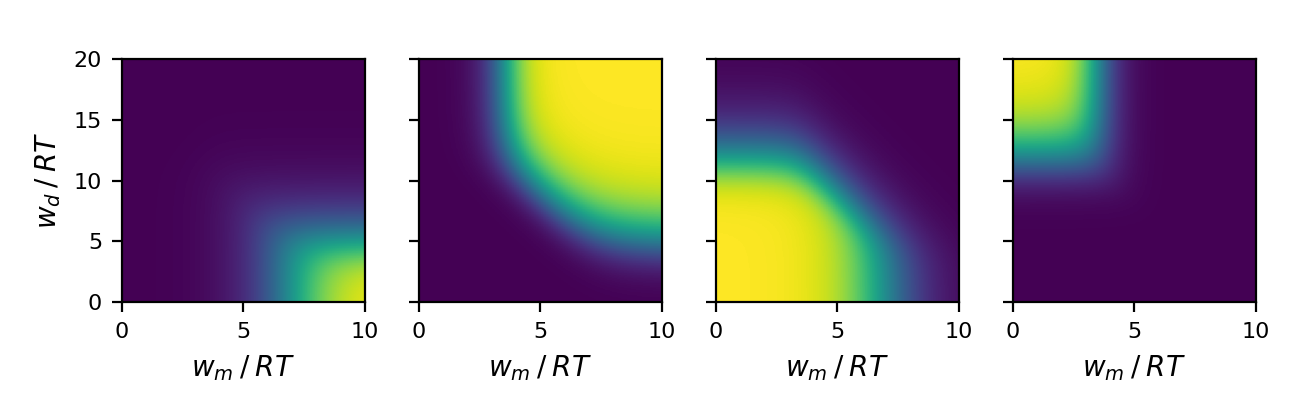

In [7]:
d = 1e-5
cyt = model2(np.exp(Y), np.exp(X), alpha, d) # cytoplasmic concentration
mem = (d - cyt) / alpha # membrane concentration
cyt_mon = dimerisation(Y, cyt)
cyt_dim = cyt - cyt_mon
mem_mon = dimerisation(Y, mem)
mem_dim = (mem - mem_mon)

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(6.5, 2)
Z = [mem_mon * alpha / d,
    mem_dim * alpha / d,
    cyt_mon / d,
    cyt_dim / d]
im = [a.imshow(z, origin='lower', vmin=0, vmax=1, extent=(0, 10, 0, 20), aspect=0.5) for z, a in zip(Z, ax)]

# contours = [a.contour(X, Y, z, colors='white', levels=[0.05, 0.5, 0.95]) for z, a in zip(Z, ax)]
# [a.clabel(c, inline=True, fontsize=6, fmt='%1.2f') for c, a in zip(contours, ax)]

[a.tick_params(axis='both', labelsize=8) for a in ax]
[a.set_xlabel(r'$w_m \: / \: RT$') for a in ax]
ax[0].set_ylabel(r'$w_d \: / \: RT$')
[a.set_yticklabels([]) for a in ax[1:]]

fig.tight_layout()
fig.savefig('Figs/four_states.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


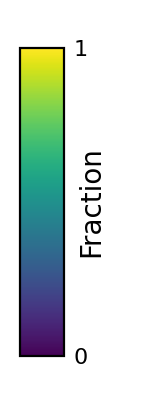

In [8]:
fig, ax = plt.subplots(figsize=(0.8, 2))
fig.subplots_adjust(right=0.4)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('viridis'), ticks=[0, 1])
# cbar.ax.set_yticks([0, 1])
cbar.ax.tick_params(size=0, labelsize=8)
ax.set_ylabel('Fraction', labelpad=-4)
fig.savefig('Figs/four_states_cbar.png', dpi=600, transparent=True)

#### Membrane dimeric fraction

<IPython.core.display.Javascript object>


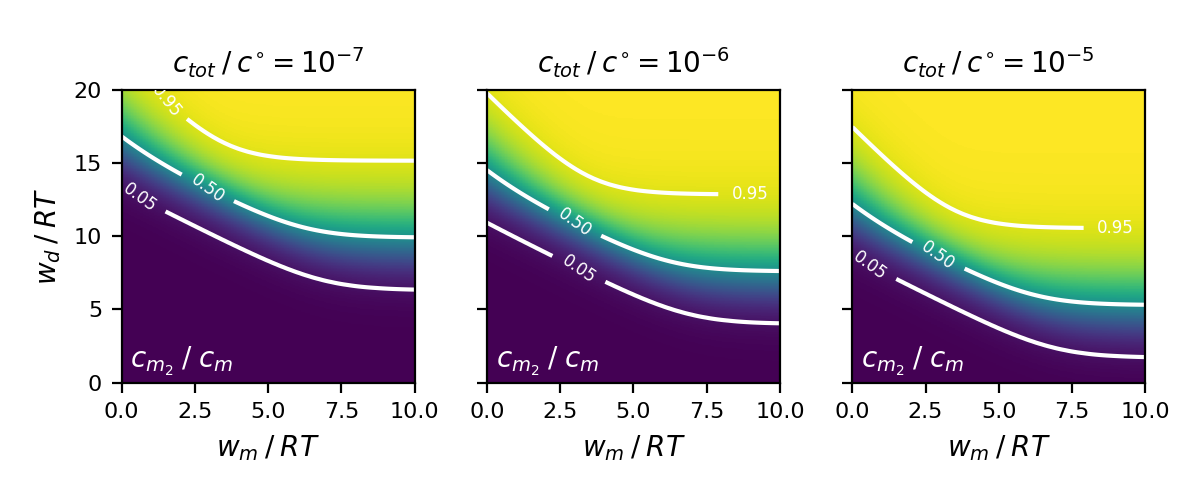

In [9]:
log_dosages = [-7, -6, -5]
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(6, 2.5)

def func(ax, log_dosage):
    dosage = 10 ** log_dosage
    cyt = model2(np.exp(Y), np.exp(X), alpha, dosage)
    mem = (dosage - cyt) / alpha   
    mem_mon = dimerisation(Y, mem)
    Z = (mem - mem_mon) / mem # membrane dimer fraction  
    ax.imshow(Z, origin='lower', extent=(0, 10, 0, 20), aspect=0.5, cmap='viridis', vmin=0, vmax=1)
    contours = ax.contour(X, Y, Z, colors='white', levels=[0.05, 0.5, 0.95])
    ax.clabel(contours, inline=True, fontsize=6, fmt='%1.2f')
    ax.set_title(r'$c_{tot} \: / \: c^{\circ} = 10^{%s}$' % log_dosage, fontsize=10)
    return Z

z0 = func(ax[0], log_dosages[0])
z1 = func(ax[1], log_dosages[1])
z2 = func(ax[2], log_dosages[2])

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
[a.set_xlabel(r'$w_m \: / \: RT$') for a in ax]
ax[0].set_ylabel(r'$w_d \: / \: RT$')
[a.tick_params(axis='both', labelsize=8) for a in ax]
[a.text(0.03, 0.05, r'$c_{m_2}\; / \; c_m$', transform=a.transAxes, c='w') for a in ax]

fig.tight_layout()
fig.savefig('Figs/energies_vs_dosage_vs_dimerisation_panels.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


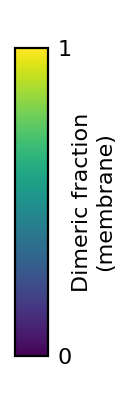

In [10]:
fig, ax = plt.subplots(figsize=(0.6, 2))
fig.subplots_adjust(right=0.4)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('viridis'), ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])
cbar.ax.tick_params(size=0, labelsize=8)
ax.set_ylabel('Dimeric fraction\n(membrane)', labelpad=0, fontsize=8)
fig.savefig('Figs/energies_vs_dosage_vs_dimerisation_panels_cbar.png', dpi=600, transparent=True)

#### Cytoplasmic dimeric fraction

<IPython.core.display.Javascript object>


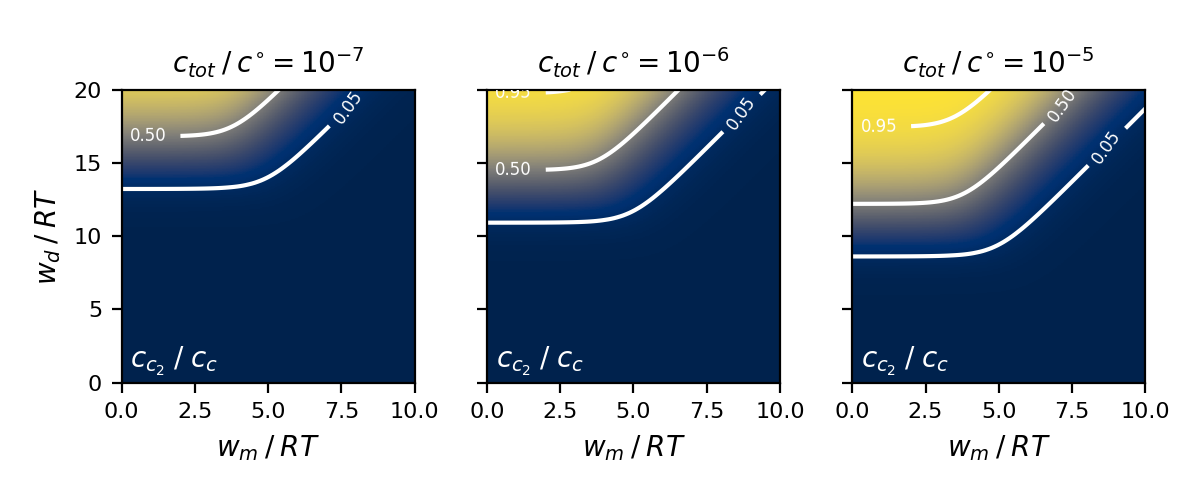

In [11]:
log_dosages = [-7, -6, -5]
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(6, 2.5)

def func(ax, log_dosage):
    dosage = 10 ** log_dosage
    cyt = model2(np.exp(Y), np.exp(X), alpha, dosage)
    cyt_mon = dimerisation(Y, cyt)
    Z = (cyt - cyt_mon) / cyt # membrane dimer fraction  
    ax.imshow(Z, origin='lower', extent=(0, 10, 0, 20), aspect=0.5, cmap='cividis', vmin=0, vmax=1)
    contours = ax.contour(X, Y, Z, colors='white', levels=[0.05, 0.5, 0.95])
    ax.clabel(contours, inline=True, fontsize=6, fmt='%1.2f')
    ax.set_title(r'$c_{tot} \: / \: c^{\circ} = 10^{%s}$' % log_dosage, fontsize=10)

func(ax[0], log_dosages[0])
func(ax[1], log_dosages[1])
func(ax[2], log_dosages[2])

ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
[a.set_xlabel(r'$w_m \: / \: RT$') for a in ax]
ax[0].set_ylabel(r'$w_d \: / \: RT$')
[a.tick_params(axis='both', labelsize=8) for a in ax]

[a.text(0.03, 0.05, r'$c_{c_2}\; / \; c_c$', transform=a.transAxes, c='w') for a in ax]

fig.tight_layout()
fig.savefig('Figs/energies_vs_dosage_vs_cyt_dimerisation_panels.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


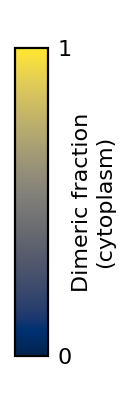

In [12]:
fig, ax = plt.subplots(figsize=(0.6, 2))
fig.subplots_adjust(right=0.4)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('cividis'), ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])
cbar.ax.tick_params(size=0, labelsize=8)
ax.set_ylabel('Dimeric fraction\n(cytoplasm)', labelpad=0, fontsize=8)
fig.savefig('Figs/energies_vs_dosage_vs_cyt_dimerisation_panels_cbar.png', dpi=600, transparent=True)

#### Rundowns

Should modify this to reflect accurate dosage range for PAR-2

<IPython.core.display.Javascript object>


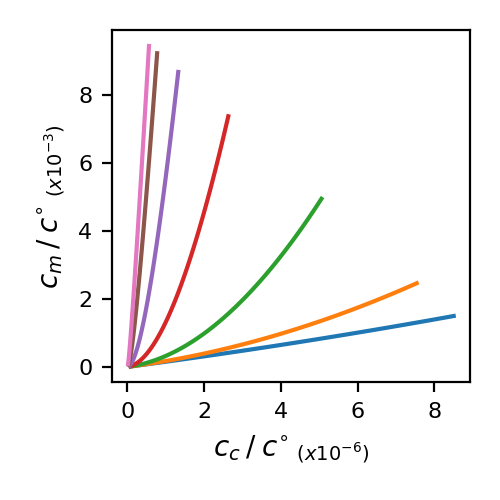

In [13]:
mem_energy = 5
dim_energies = np.arange(5, 19, 2)
dosages = np.linspace(1e-7, 1e-5, 100)

fig, ax = plt.subplots()
for d in dim_energies:
    cyt = model2(np.exp(d), np.exp(mem_energy), alpha, dosages)
    mem = (dosages - cyt) / alpha
    ax.plot(cyt / 1e-6, mem / 1e-3)
    
ax.set_xlabel(r'$c_c \: / \: c^{\circ} \: _{(x10^{-6})}$')
ax.set_ylabel(r'$c_m \: / \: c^{\circ} \: _{(x10^{-3})}$')
# ax.set_xlim(left=0)
# ax.set_ylim(bottom=0)
# ax.axis('equal')
# ax.text(0.95, 0.95, r'$c_m = \alpha\:c_c^{\;\;\;\beta}$', transform=ax.transAxes, fontsize=9, ha='right', va='top')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/rundowns.png', transparent=True, dpi=600)

#### Effective exponent

<IPython.core.display.Javascript object>


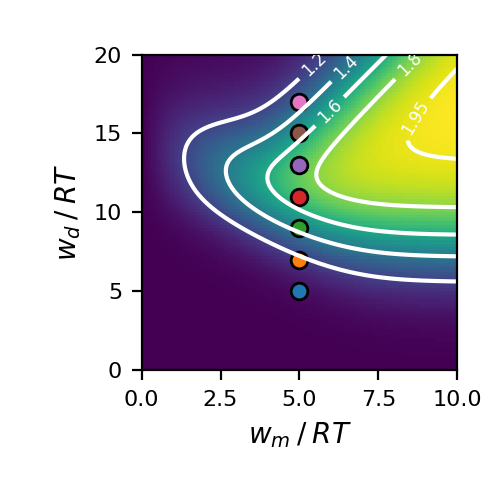

In [28]:
n_dos = 2
dosages = np.linspace(1e-7, 1e-5, n_dos)
cyts = np.zeros([n_dos, 100, 100])
mems = np.zeros([n_dos, 100, 100])
for i, d in enumerate(dosages):
    cyts[i, :, :] = model2(np.exp(Y), np.exp(X), alpha, d)
    mems[i, :, :] = (d - cyts[i, :, :]) / alpha   

res = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        x = cyts[:, i, j]
        y = mems[:, i, j]
        res[i, j] = np.polyfit(np.log10(x), np.log10(y), 1, w=np.sqrt(y))[0]
        
fig, ax = plt.subplots()
fig.set_size_inches(2.5, 2.5)
ax.imshow(res, origin='lower', extent=(0, 10, 0, 20), aspect=0.5, cmap='viridis')
contours = ax.contour(X, Y, res, colors='white', levels=list(np.arange(1, 2, 0.2)) + [1.95])
ax.clabel(contours, inline=True, fontsize=6, fmt='%g')

for y in np.arange(5, 19, 2):
    ax.scatter(5, y, edgecolors='k')

ax.set_xlabel(r'$w_m \: / \: RT$')
ax.set_ylabel(r'$w_d \: / \: RT$')
ax.tick_params(axis='both', labelsize=8)
fig.tight_layout()
fig.savefig('Figs/exponents.png', transparent=True, dpi=600)

<IPython.core.display.Javascript object>


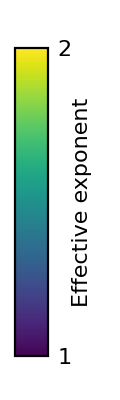

In [29]:
fig, ax = plt.subplots(figsize=(0.6, 2))
fig.subplots_adjust(right=0.4)
cbar = matplotlib.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('viridis'), ticks=[0, 1])
cbar.ax.set_yticklabels(['1', '2'])
cbar.ax.tick_params(size=0, labelsize=8)
ax.set_ylabel('Effective exponent', labelpad=0, fontsize=8)
fig.savefig('Figs/exponents_cbar.png', transparent=True, dpi=600)